In [1]:
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

# Setting random seed (To control the randomness)
random.seed(42)

# Importing Survey Dataset

In [3]:
column_names = ['timestamp', 'name', 'gender', 'mother_tongue', 'mother_tongue_rating', 'no_of_fluent_languages', 'educational_qualification', 'residing_city', 'state', 'resided_in_the_same_city_from_birth',
               'teaching_language_preference', 'notes_language_preference', 'questionpaper_language_preference', 'learning_in_local_language', 'exam_in_regional_language', 'teaching_in_regional_language', 
               'knowledge_improvement']

survey_results_1 = pd.read_excel("Survey (Responses) - 1.xlsx", names = column_names, header = None, skiprows = 1)
survey_results_2 = pd.read_csv("Survey (Responses) - 2.csv", names = column_names, header = None, skiprows = 1)

# Concatenating two survey results (files) into single file.
survey_data = pd.concat([survey_results_1, survey_results_2], axis = 0)
survey_data = survey_data.sample(frac=1).reset_index(drop=True)

# Dropping features having confidential information
survey_data.drop(['name'], axis = 1, inplace = True)

print(survey_data.shape)
survey_data.head()

(794, 16)


,timestamp,gender,mother_tongue,mother_tongue_rating,no_of_fluent_languages,educational_qualification,residing_city,state,resided_in_the_same_city_from_birth,teaching_language_preference,notes_language_preference,questionpaper_language_preference,learning_in_local_language,exam_in_regional_language,teaching_in_regional_language,knowledge_improvement
0,2022-06-15 19:40:28.614000,Female,Tamil,5.0,5,Drgee,Humanthanagar,Karnataka,Yes,Regional Language,Regional Language,Regional Language,Yes,Yes,Yes,Yes
1,2022/06/28 10:06:24 pm GMT+5:30,Male,Telugu,5.0,2,Bachelor's,Guntur,Andhra Pradesh,Yes,English Language,English Language,English Language,Maybe,No,Yes,Yes
2,2022/07/01 10:47:14 pm GMT+5:30,Female,Hindi,3.0,1,UG,Lucknow,Uttar Pradesh,No,Hybrid Language,English Language,Hybrid Language,Maybe,No,Maybe,No
3,2022/06/27 4:47:37 pm GMT+5:30,Male,Telugu,5.0,3,BTech,Hyderabad,Telangana,Yes,Hybrid Language,English Language,English Language,Yes,No,Yes,No
4,2022-06-15 21:53:58.647000,Male,Kannada,5.0,3,Mca,Bangalore,Karnataka,Yes,Hybrid Language,English Language,English Language,Yes,Yes,Yes,Yes


# The Variable Types

In [4]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            794 non-null    object 
 1   gender                               792 non-null    object 
 2   mother_tongue                        793 non-null    object 
 3   mother_tongue_rating                 793 non-null    float64
 4   no_of_fluent_languages               791 non-null    object 
 5   educational_qualification            791 non-null    object 
 6   residing_city                        792 non-null    object 
 7   state                                791 non-null    object 
 8   resided_in_the_same_city_from_birth  793 non-null    object 
 9   teaching_language_preference         792 non-null    object 
 10  notes_language_preference            791 non-null    object 
 11  questionpaper_language_preferenc

In [5]:
# Since we don't need the timestamp feature, we can drop it.
survey_data = survey_data.drop(['timestamp'], axis = 1)

survey_data.head()

,gender,mother_tongue,mother_tongue_rating,no_of_fluent_languages,educational_qualification,residing_city,state,resided_in_the_same_city_from_birth,teaching_language_preference,notes_language_preference,questionpaper_language_preference,learning_in_local_language,exam_in_regional_language,teaching_in_regional_language,knowledge_improvement
0,Female,Tamil,5.0,5,Drgee,Humanthanagar,Karnataka,Yes,Regional Language,Regional Language,Regional Language,Yes,Yes,Yes,Yes
1,Male,Telugu,5.0,2,Bachelor's,Guntur,Andhra Pradesh,Yes,English Language,English Language,English Language,Maybe,No,Yes,Yes
2,Female,Hindi,3.0,1,UG,Lucknow,Uttar Pradesh,No,Hybrid Language,English Language,Hybrid Language,Maybe,No,Maybe,No
3,Male,Telugu,5.0,3,BTech,Hyderabad,Telangana,Yes,Hybrid Language,English Language,English Language,Yes,No,Yes,No
4,Male,Kannada,5.0,3,Mca,Bangalore,Karnataka,Yes,Hybrid Language,English Language,English Language,Yes,Yes,Yes,Yes


In [6]:
survey_data.isnull().sum()

gender                                  2
mother_tongue                           1
mother_tongue_rating                    1
no_of_fluent_languages                  3
educational_qualification               3
residing_city                           2
state                                   3
resided_in_the_same_city_from_birth     1
teaching_language_preference            2
notes_language_preference               3
questionpaper_language_preference       2
learning_in_local_language             52
exam_in_regional_language               1
teaching_in_regional_language           2
knowledge_improvement                   1
dtype: int64

In [7]:
survey_data = survey_data[survey_data['knowledge_improvement'].notna()]

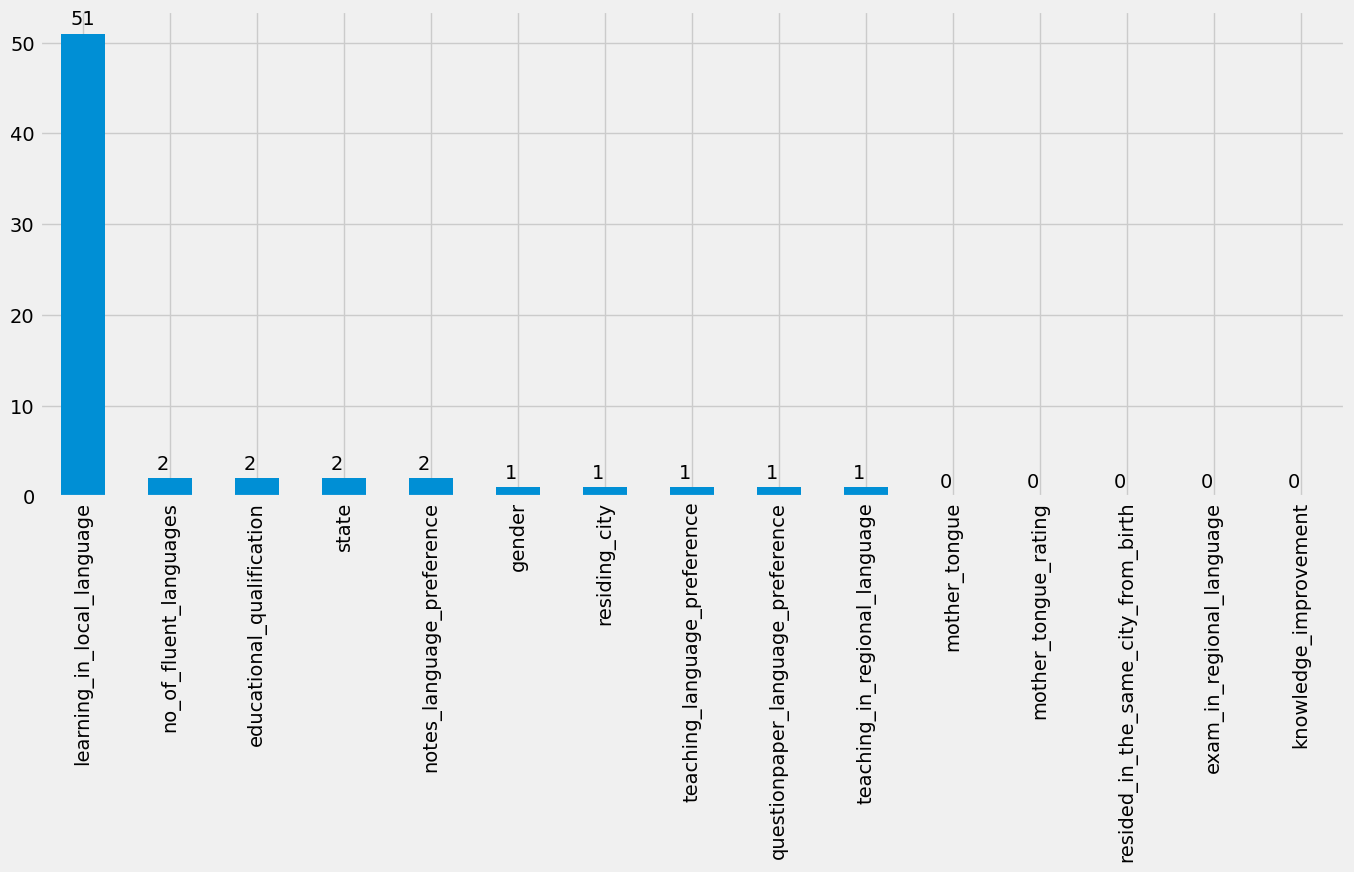

In [8]:
plt.figure(figsize = (15, 6))
ax = pd.Series(survey_data.isnull().sum()).sort_values(ascending = False).plot.bar()

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 1))

plt.show()

# The Target Variable

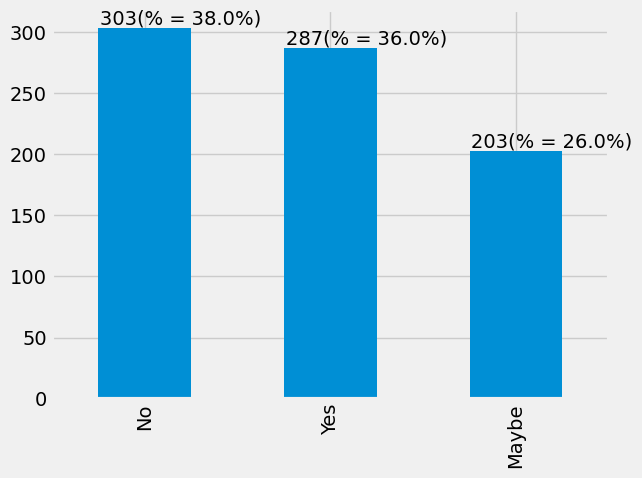

In [9]:
ax = survey_data['knowledge_improvement'].value_counts().plot.bar()

for p in ax.patches:
    ax.annotate('{}(% = {}%)'.format(p.get_height(), round(p.get_height() / len(survey_data['knowledge_improvement']), 2)*100), (p.get_x() + 0.01, p.get_height() + 3))

plt.show()

**38% of the students who participated in the survey claims that, teaching in regional language does not improve their knowledge on the subject**

**While 36% claims that knowledge is improved upon teaching sbject in regional language and the remaining 26% of the students are doubtful.**

## Numerical Features

### Mother tongue rating

In [10]:
mother_tongue_rating_dict_ = {1: "Poor", 2: "Fair", 3: "Good", 4: "Very Good", 5: "Excellent"}
survey_data['mother_tongue_rating'] = survey_data['mother_tongue_rating'].map(mother_tongue_rating_dict_)

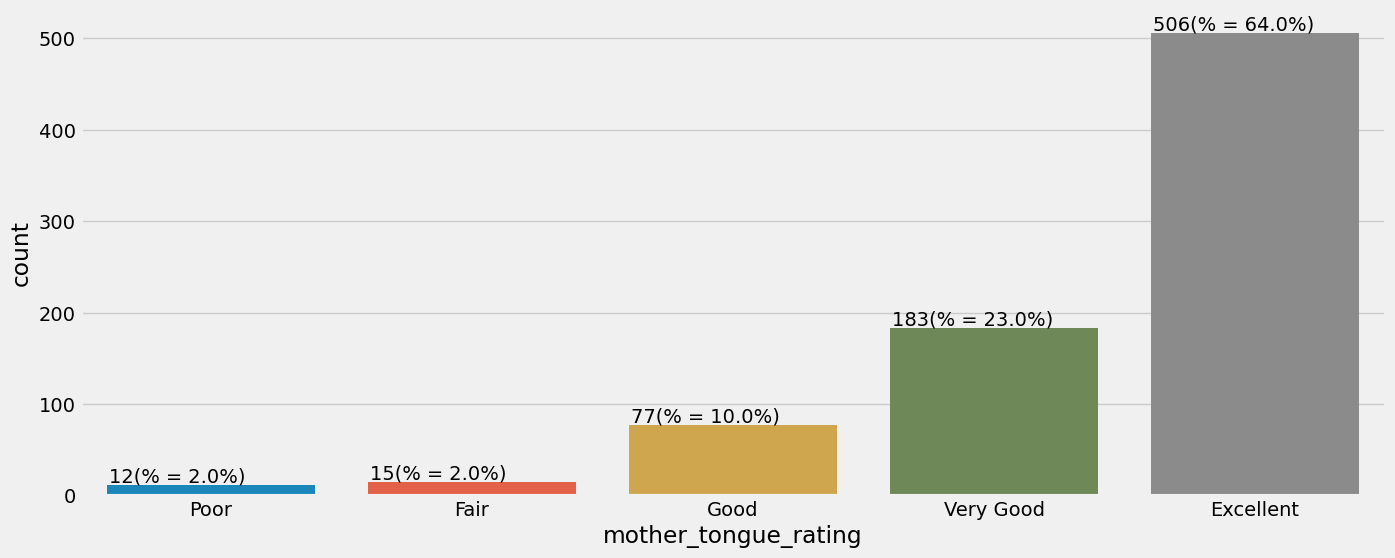

In [11]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data = survey_data, x= 'mother_tongue_rating', order = ["Poor", "Fair", "Good", "Very Good", "Excellent"])

for p in ax.patches:
    ax.annotate('{}(% = {}%)'.format(p.get_height(), round(p.get_height() / len(survey_data['mother_tongue_rating']), 2)*100), (p.get_x() + 0.01, p.get_height() + 3))

plt.show()

**About 87% of the students are comfortable with their mother tongue. (Fluent in mother tongue = (mother_tongue_rating == 4) + (mother_tongue_rating == 5))**

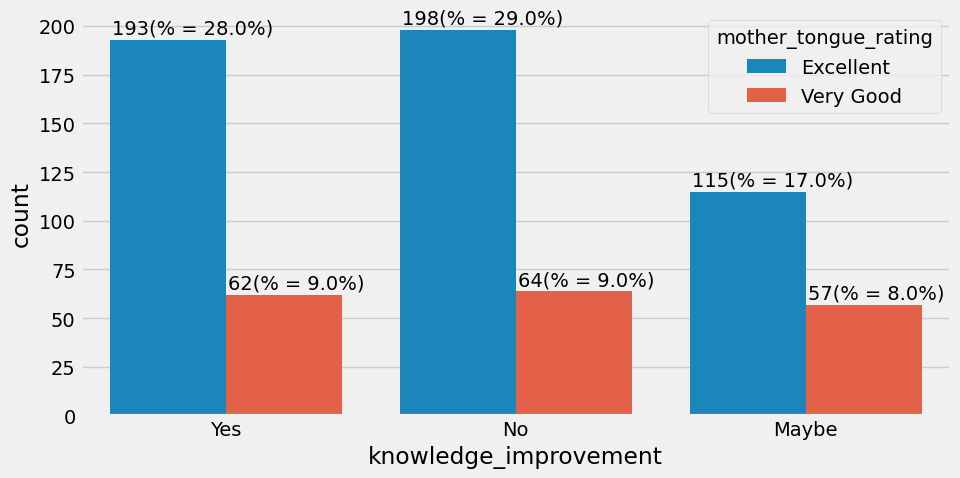

In [12]:
plt.figure(figsize = (10, 5))

temp_data = survey_data[(survey_data['mother_tongue_rating'] == "Very Good") | (survey_data['mother_tongue_rating'] == "Excellent")]
ax = sns.countplot(data = temp_data, 
            x = "knowledge_improvement", hue = "mother_tongue_rating", order = ["Yes", "No", "Maybe"])

for p in ax.patches:
    ax.annotate('{}(% = {:.1f}%)'.format(p.get_height(), round(p.get_height() / len(temp_data), 2)*100), (p.get_x() + 0.01, p.get_height() + 3))

plt.show()

**Out of 87% of students who are comfortable with their mother tongue, only 37% are agreeing that their knowledge is improved when they are taught in regional language. Interestingly 38% of them are considering that there will be no impact and 25% of them think that regional language teaching might help them understand better.**

### no_of_fluent_languages

In [13]:
# Replacing the missing values with a new value.
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].fillna(99999999)

In [14]:
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(lambda x: str(x).replace(',', ' ').replace('(', '').replace(')', '').strip())

In [15]:
def extract_int(lang_list):
    
    lang_list_split = lang_list.split()
    
    num_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    if (len(lang_list_split) > 1) and (lang_list_split[0] in str(num_list)):
        return str(lang_list_split[0])
    
    else:
        return lang_list
        
    
def extract_string(lang_list):
    
    lang_list_split = lang_list.split()
    
    num_str_dict = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ಎರಡು': 2}
    
    if lang_list_split[0].lower() in num_str_dict:
        return str(num_str_dict[lang_list_split[0].lower()])
    else:
        return lang_list

def no_of_lang(lang_list):
    lang_list_split = lang_list.split()
    
    if len(lang_list_split) > 1:
        
        if 'and' in lang_list_split:
            lang_list_split.remove('and')
        
        return len(lang_list_split)
    else:
        return lang_list

def string_to_int(string):
    
    try:
        return int(float(string))
    except:
        if string == 'Good':
            return 99999999
        else:
            return len(string.split())
        
def covert_to_int(value):
    
    try:
        return(int(value))
    except:
        return int(len(value.split()))

In [16]:
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(lambda x: str(x).replace(',', ' ').replace('(', '').replace(')', '').strip())

# Extracting number from strings
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(extract_int)

# Converting String to number
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(extract_string)

# Converting list of unique languages each person can speak into total number of languages a person can speak
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(no_of_lang)

# Taking highest number when the range of languages one can speak is given
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(lambda x: str(x).split('-')[-1])

# Replacing 101 with nan value
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(lambda x: x.replace('101', '99999999'))

# Converting string to numbers
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].apply(covert_to_int)

# Replacing NaN values where it belongs
survey_data['no_of_fluent_languages'] = survey_data['no_of_fluent_languages'].replace(99999999, np.nan)

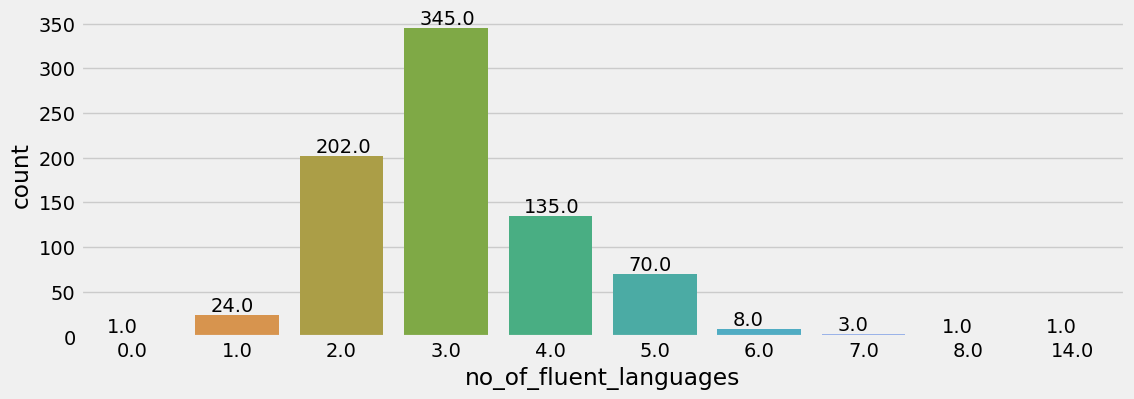

In [17]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(data = survey_data, x= 'no_of_fluent_languages')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 4))

plt.show()

In [18]:
for num in list(survey_data['no_of_fluent_languages'].value_counts().index):
    print("{}% of students knows {} languages.".format(round(len(survey_data[survey_data['no_of_fluent_languages'] == num]) / len(survey_data)*100, 2), num))

43.51% of students knows 3.0 languages.
25.47% of students knows 2.0 languages.
17.02% of students knows 4.0 languages.
8.83% of students knows 5.0 languages.
3.03% of students knows 1.0 languages.
1.01% of students knows 6.0 languages.
0.38% of students knows 7.0 languages.
0.13% of students knows 0.0 languages.
0.13% of students knows 8.0 languages.
0.13% of students knows 14.0 languages.


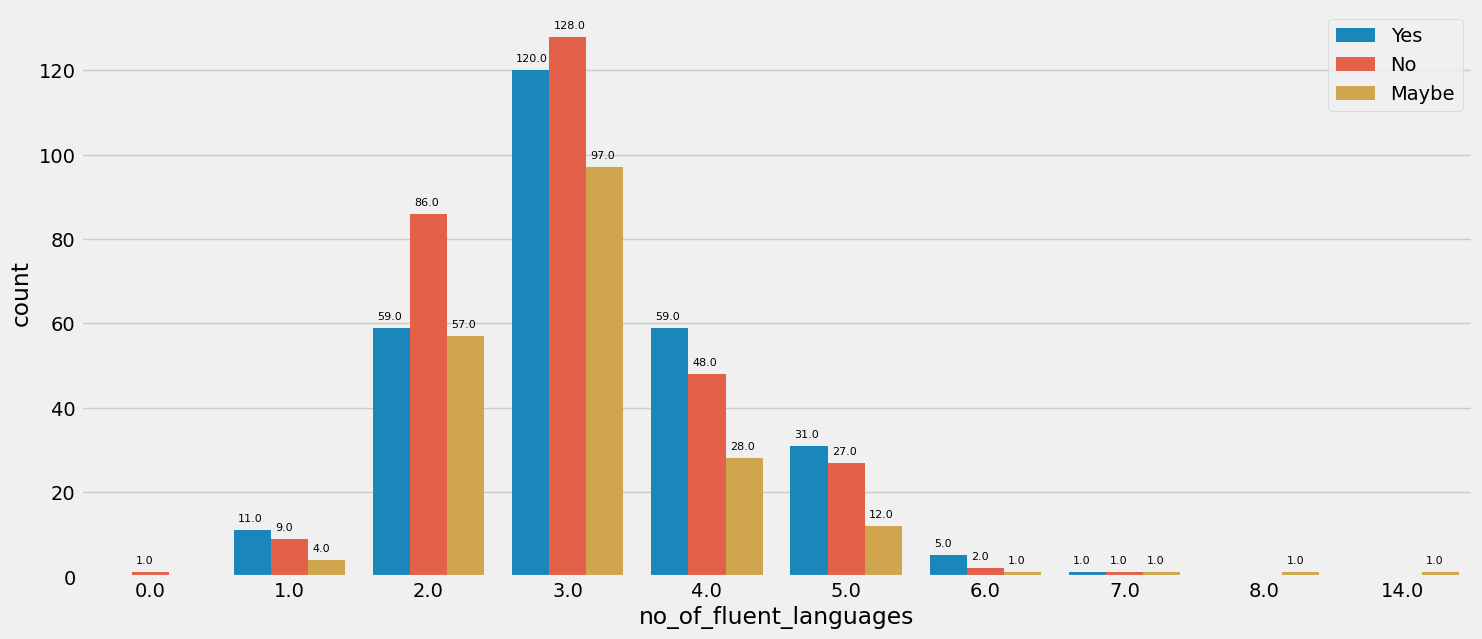

In [19]:
plt.figure(figsize=(16, 7))
ax = sns.countplot(data = survey_data, x = 'no_of_fluent_languages', hue = "knowledge_improvement")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 2), fontsize = 8)

plt.legend(loc='upper right')
plt.show()

**From the above graph we can see that, most of the people 345 (% = 43.51%) of the participants are fluent in 3 languages out of which 37% believe that knowledge improvement is not impacted by teaching in regional language, 35% beleive that there will be improvement and only 28% think that there might be an improvement.**

**People who are fluent in more than 3 languages believe that knowledge will be improved.**

# Categorical Features

## mother_tongue

In [20]:
survey_data['mother_tongue'] = survey_data['mother_tongue'].apply(lambda x: str(x).lower().strip().replace('ಕನ್ನಡ', 'kannada').replace('kannadaa', 'kannada').replace('ಕನ್ನಡ ', 'kannada').replace('ಕನ್ನಡ (KANNADA)', 'kannada'))
survey_data['mother_tongue'] = survey_data['mother_tongue'].apply(lambda x: str(x).lower().strip().replace('Kannada.', 'kannada').replace('kannada (kannada)', 'kannada').replace('kannada.', 'kannada'))
survey_data['mother_tongue'] = survey_data['mother_tongue'].apply(lambda x: str(x).lower().strip().replace('kannada 4', 'kannada').replace('kann6', 'kannada').replace('kannnada', 'kannada').replace('marati', 'marathi'))
survey_data['mother_tongue'] = survey_data['mother_tongue'].apply(lambda x: str(x).lower().strip().replace('tami', 'tamil').replace('tamill', 'tamil').replace('telgu', 'telugu').replace('teligu', 'telugu').replace('telugu5', 'telugu').replace('telangana', 'telugu'))
survey_data['mother_tongue'] = survey_data['mother_tongue'].apply(lambda x: str(x).lower().strip().replace('malyalam', 'malayalam').replace('malayalm', 'malayalam').replace('urude', 'urdu').replace('hindhi', 'hindi').replace('odiya', 'odia'))

survey_data = survey_data[survey_data.mother_tongue != '3']

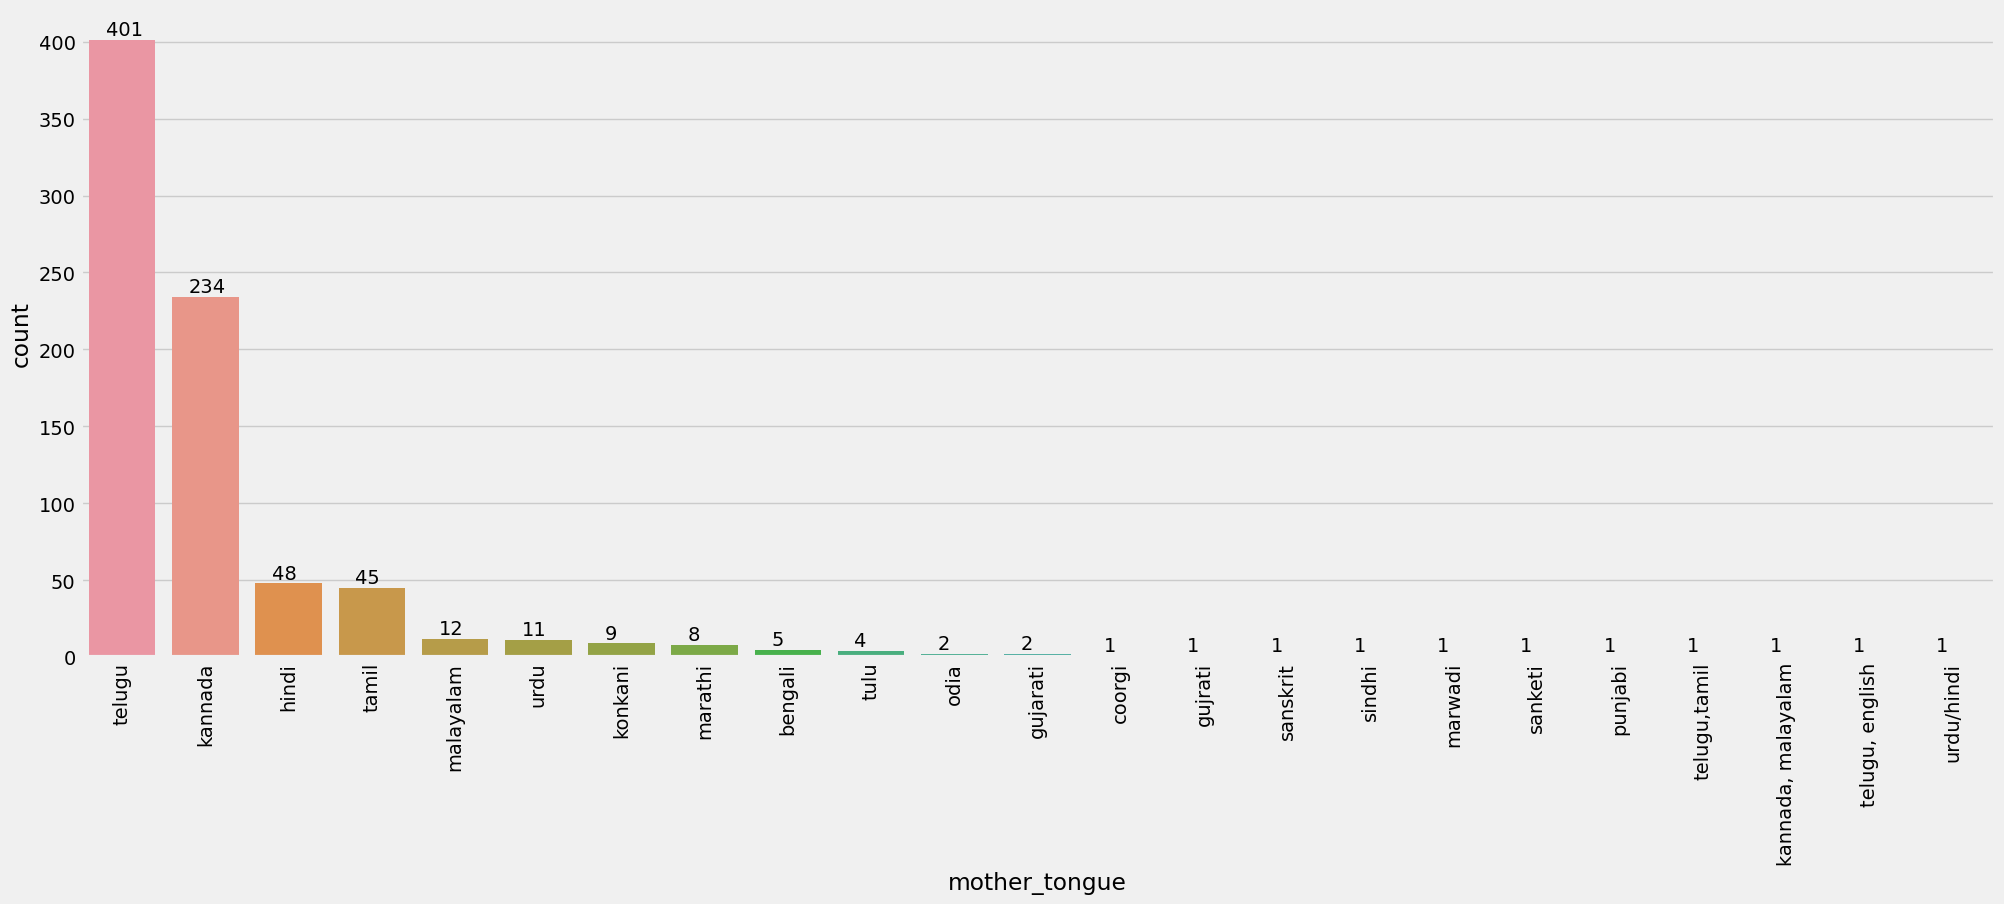

In [21]:
plt.figure(figsize=(22, 8))
ax = sns.countplot(data = survey_data, x = 'mother_tongue', order = list(survey_data['mother_tongue'].value_counts().index))

plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate('{}'.format(int(p.get_height())), (p.get_x() + 0.20, p.get_height() + 3))

plt.show()

**Telugu, Kannada, Hindi and Tamil are the top 4 native languages**

**We can consider malayalam, urdu, konkani, etc. as "Other" Category so that we can reduce the rare labels while building our model and we can also reduce the dimensionality.**

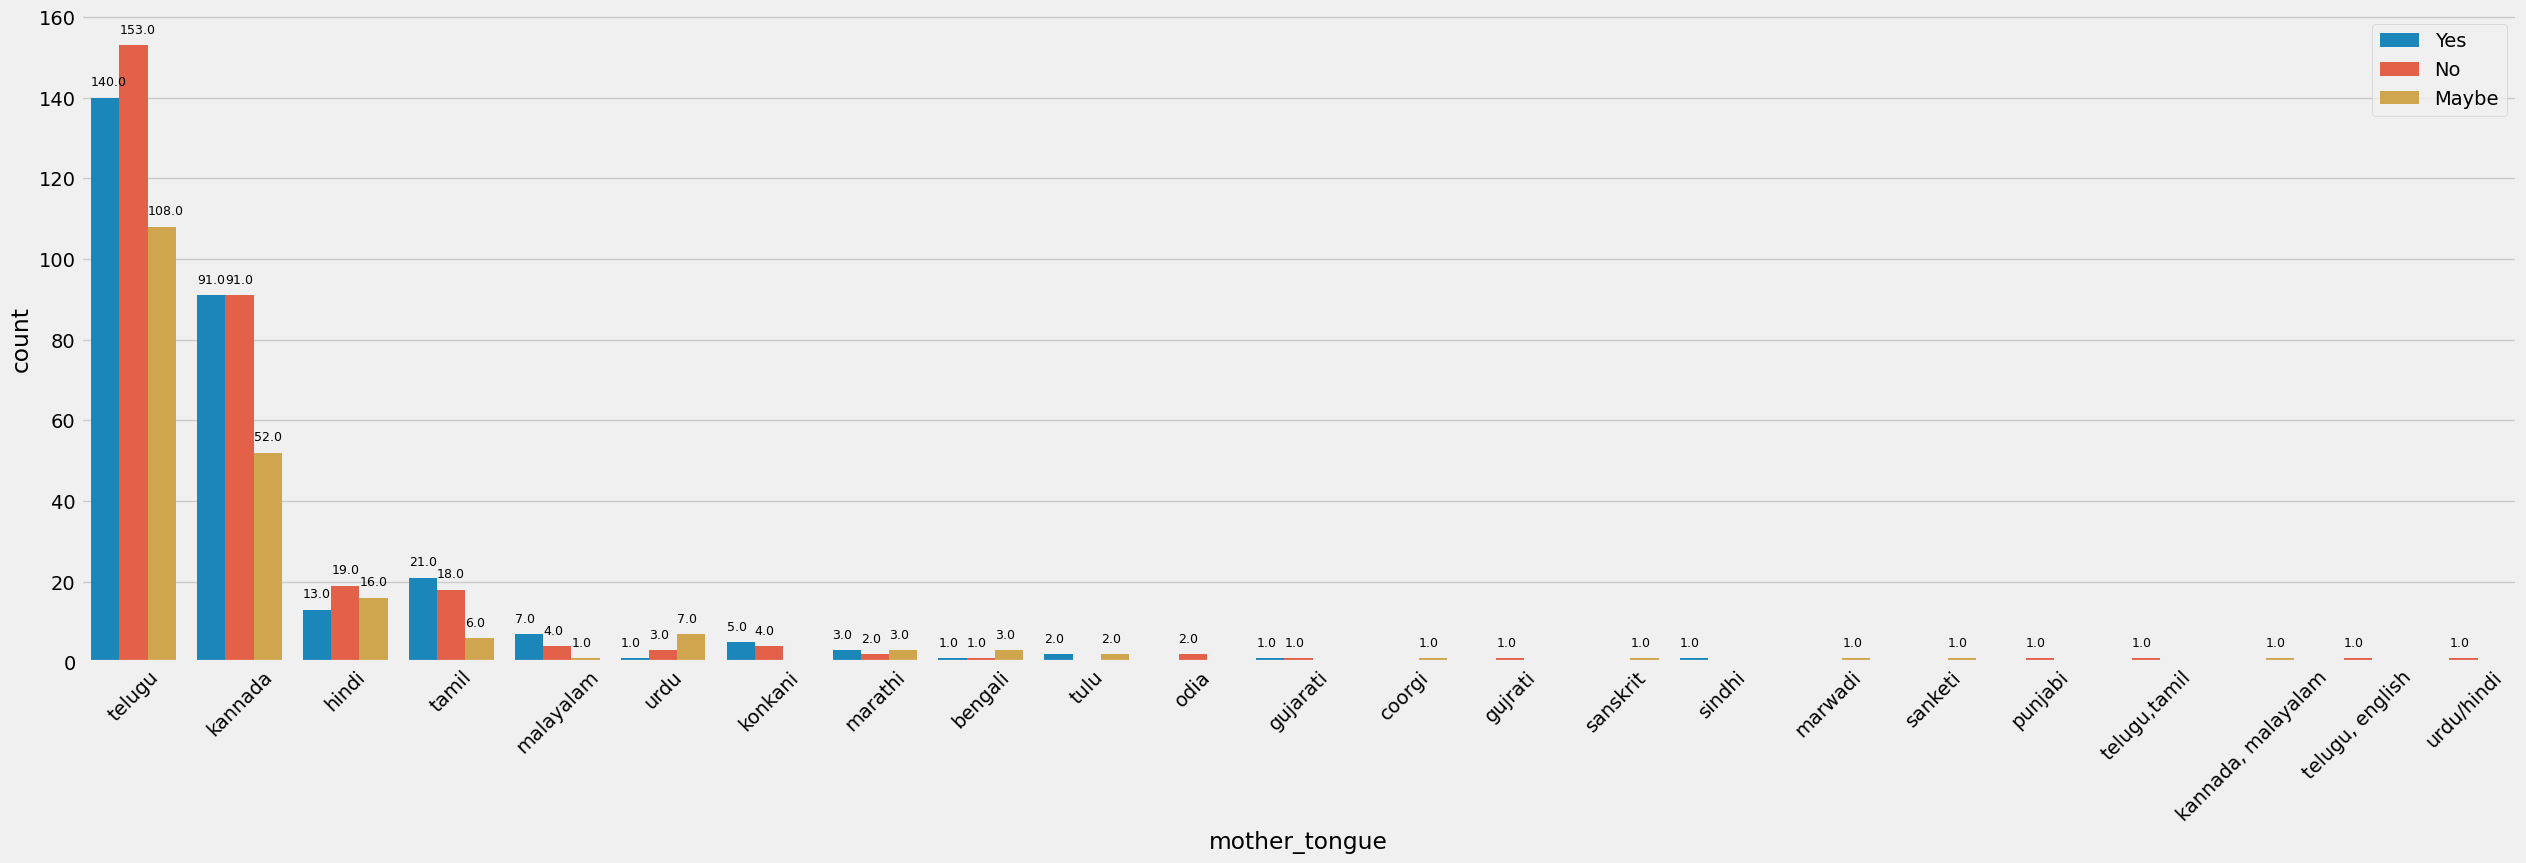

In [22]:
plt.figure(figsize=(28, 8))
ax = sns.countplot(data = survey_data, x='mother_tongue', hue = 'knowledge_improvement', order = list(survey_data['mother_tongue'].value_counts().index))

plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() , p.get_height() + 3), fontsize = 9)

plt.legend(loc='upper right')
plt.show()

**It looks like there is a small line between regional language and knowledge improvement. We can see very similar results in each category**

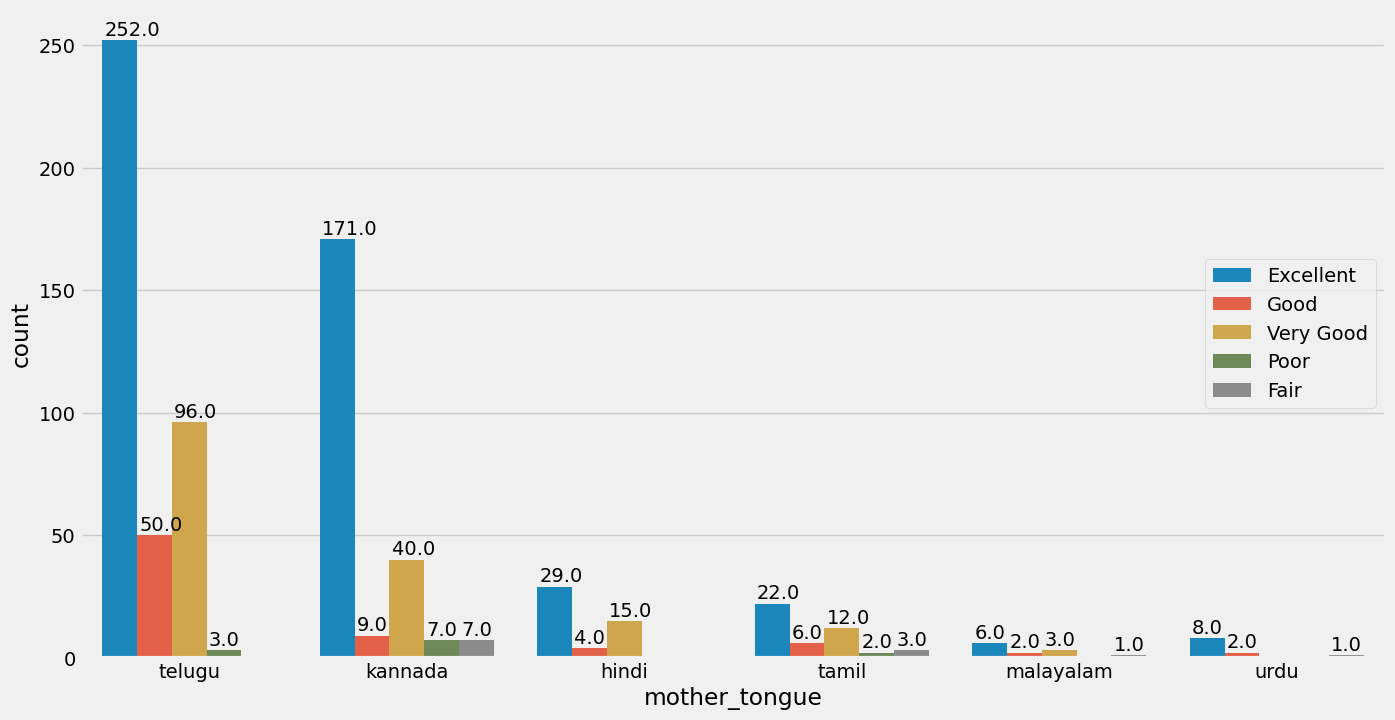

In [23]:
plt.figure(figsize=(15, 8))

ax = sns.countplot(data = survey_data, x='mother_tongue', hue ='mother_tongue_rating', order = list(survey_data['mother_tongue'].value_counts().index)[:6])
ax.legend(loc='right')

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.01, p.get_height() + 1.9))

plt.show()

**Even though majority of the people are fluent in their native language they are not preferring regional language for studies. There might be so many reasons for it, for instance, one can read and talk in telugu but can't write it.**

**Let's see how many voted as "Yes" for knowledge improvement who are "Excellent" at their mother tongue.**

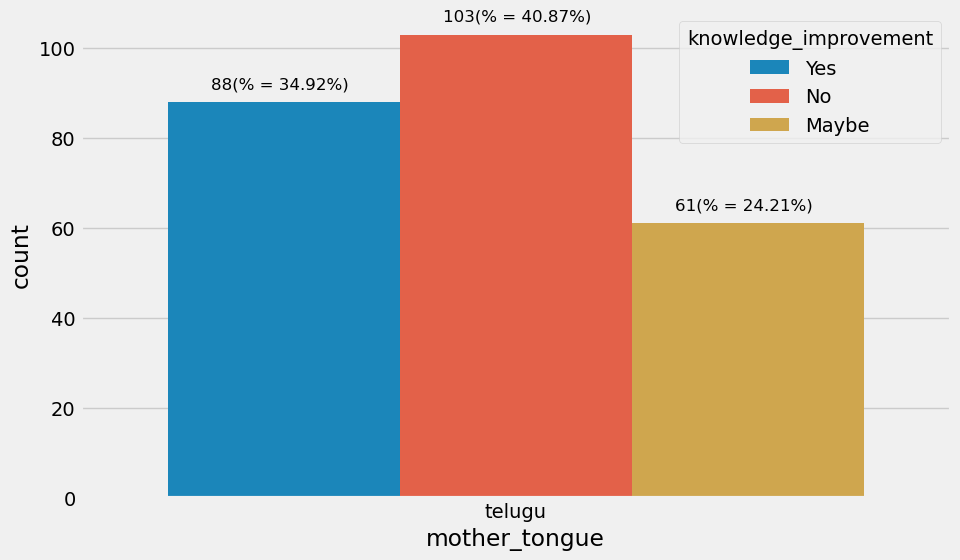

In [24]:
plt.figure(figsize = (10, 6))

temp_data = survey_data[(survey_data['mother_tongue'] == 'telugu') & (survey_data['mother_tongue_rating'] == 'Excellent')]

ax = sns.countplot(data = temp_data, x = 'mother_tongue', hue = 'knowledge_improvement')

for p in ax.patches:
    ax.annotate('{}(% = {}%)'.format(int(p.get_height()), round((p.get_height() / len(temp_data))*100, 2)), (p.get_x() + 0.05, p.get_height() + 3), fontsize = 12)

plt.show()

**People who's native language is Telugu and are excellent in it, they are not preferring regional language education for knowledge improvement.**

**If we ASSUME "maybe" category as "Yes", then we can say that regional language teaching does have an impact on the knowledge improvement.**

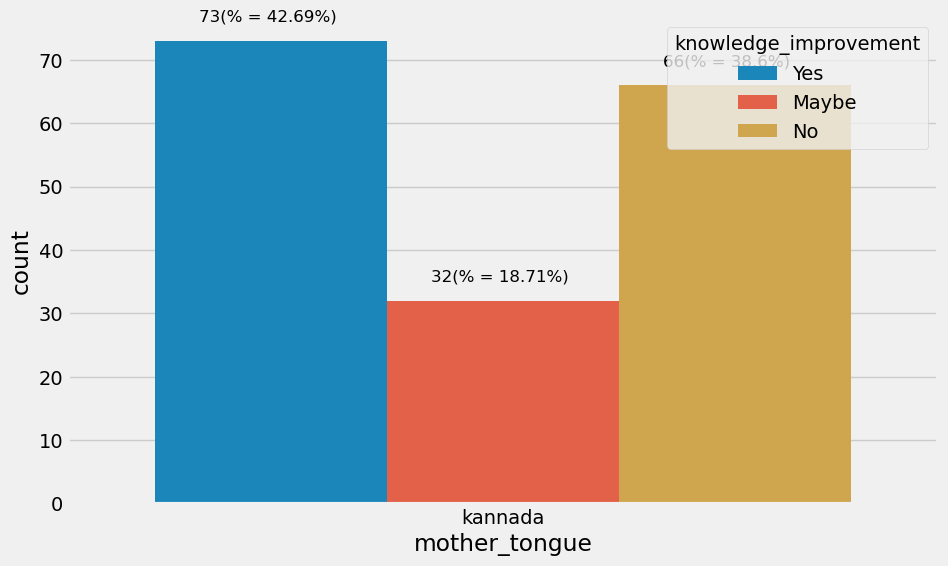

In [25]:
plt.figure(figsize = (10, 6))

temp_data = survey_data[(survey_data['mother_tongue'] == 'kannada') & (survey_data['mother_tongue_rating'] == 'Excellent')]

ax = sns.countplot(data = temp_data, x = 'mother_tongue', hue = 'knowledge_improvement')

for p in ax.patches:
    ax.annotate('{}(% = {}%)'.format(int(p.get_height()), round((p.get_height() / len(temp_data))*100, 2)), (p.get_x() + 0.05, p.get_height() + 3), fontsize = 12)

plt.show()

**People who's native language is Kannada and are excellent in it, they believe that regional language education improves their knowledge on the subject.**

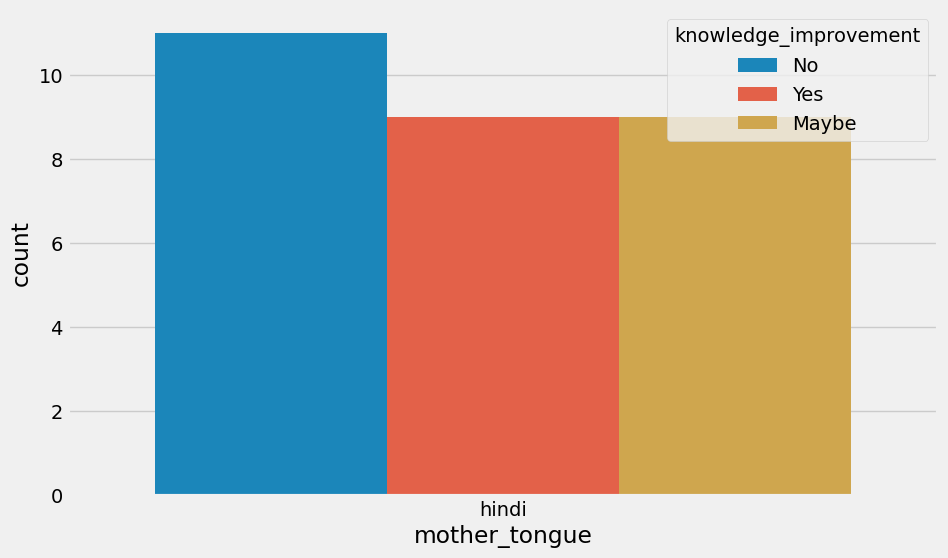

In [26]:
plt.figure(figsize = (10, 6))

temp_data = survey_data[(survey_data['mother_tongue'] == 'hindi') & (survey_data['mother_tongue_rating'] == 'Excellent')]

ax = sns.countplot(data = temp_data, x = 'mother_tongue', hue = 'knowledge_improvement')

for p in ax.patches:
    ax.annotate('{}(% = {}%)'.format(int(p.get_height()), round((p.get_height() / len(temp_data))*100, 2)), (p.get_x() + 0.05, p.get_height() + 3), fontsize = 12)

plt.show()

**We can see similar results when mother tongue is Telugu**

## educational_qualification

**Since we have small dataset, inorder to reduce the dimensionalty of the new features, I am going to make 3 categories in educational qualification.**

**They are: Before Undergraduate, Undergraduate and After Undergraduate.**

In [27]:
# Replacing NaN values so that they won't be mixed up while processing
survey_data['educational_qualification'] = survey_data['educational_qualification'].fillna(999999999)

# Converting every value to lowercase for easy comparisons
survey_data['educational_qualification'] = survey_data['educational_qualification'].apply(lambda x: str(x).lower().strip())

In [28]:
def to_under_graduation(value):
    
    if ("b tech" in value) | ("b.tech" in value) | ("btech" in value) | ("b. tech" in value) | ("b-tech" in value) | ("b- tech" in value) | ("technology" in value) | ("bbm" in value) | ("bpt" in value):
        return "UNDERGRADUATE"
    
    if ("bcom" in value) | ("b. com.," in value) | ("b.com" in value) | ("b com" in value) | ("b. come degree" in value) | ("b. com" in value) | ("bachelor's of commerce" in value) | ("commerce" in value):
        return "UNDERGRADUATE"
    
    if ("be" in value) | ("b.e" in value) | ("b e" in value) | ("b. e." in value) | ("b. e" in value) | ("bachelor of engineering" in value) | ("graduate" in value) | ("bvoc" in value):
        return "UNDERGRADUATE"
    
    if ("engineering" in value) | ("engeneering" in value) | ("engg" in value) | ("under" in value) | ("engineer" in value) | (".com" in value) | ("ug" in value) | ("drgee" in value) | ("bphed" in value):
        return "UNDERGRADUATE"
    
    if ("bba" in value) | ("degree" in value) | ("degee" in value) | ("diploma" in value) | ("b." in value) | ("bfa" in value) | ("llb" in value) | ("m." in value) | ("bsc" in value) | ("ba" in value):
        return "UNDERGRADUATE"
    
    if ("b.a" in value) | ("b.a." in value) | ("bachelor of arts" in value) | ("b. a. graduate" in value) | ("bachelors" in value) | ("bachelor's" in value) | ("bachelor" in value) | ("b-pharmacy" in value) | ("b pharmacy" in value):
        return "UNDERGRADUATE"
    
    else:
        return value
    
    
def to_after_under_graduation(value):
    
    if ("mba" in value) | ("m.b.a" in value) | ("m. ba." in value) | ("mbbs" in value) | ("bds" in value) | ("doctor" in value):
        return "AFTER UNDERGRADUATION"
    
    if ("m.tech" in value) | ("m tech" in value) | ("mtech" in value) | ("m-tech" in value) | ("mfa" in value) | ("pg" in value):
        return "AFTER UNDERGRADUATION"
    
    if ("masters" in value) | ("master’s" in value) | ("ms" in value) | ("graduation" in value) | ("physiotherapy" in value):
        return "AFTER UNDERGRADUATION"
    
    if ("post" in value) | ("phd" in value) | ("ph. d" in value) | ("pgpm in marketing" in value) | ("pgdm" in value) | ("ca" in value) | ("m com" in value):
        return "AFTER UNDERGRADUATION"
    
    else:
        return value


def to_below_under_graduation(value):
    
    if value.islower():
        return "BELOW UNDERGRADUATION"
    
    return value
    
    
survey_data['educational_qualification'] = survey_data['educational_qualification'].apply(to_under_graduation)
survey_data['educational_qualification'] = survey_data['educational_qualification'].apply(to_after_under_graduation)
survey_data['educational_qualification'] = survey_data['educational_qualification'].apply(to_below_under_graduation)

# Since an input is given a number, I am converting it to a null value
survey_data = survey_data.replace(to_replace = ['4'], value = '999999999')

# Putting all the temp values back to null values
survey_data = survey_data.replace(to_replace = ['999999999'], value = np.nan)

In [29]:
survey_data['educational_qualification'].value_counts()

UNDERGRADUATE            632
AFTER UNDERGRADUATION    103
BELOW UNDERGRADUATION     54
Name: educational_qualification, dtype: int64

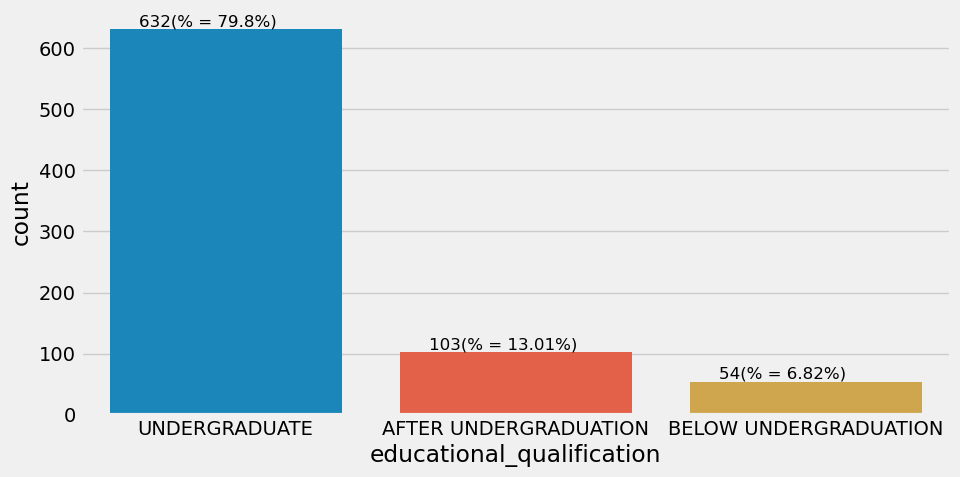

In [30]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(data = survey_data, x = "educational_qualification")

for p in ax.patches:
    ax.annotate('{}(% = {}%)'.format(int(p.get_height()), round((p.get_height() / len(survey_data['educational_qualification']))*100, 2)), (p.get_x() + 0.1, p.get_height() + 5), fontsize = 12)


plt.show()

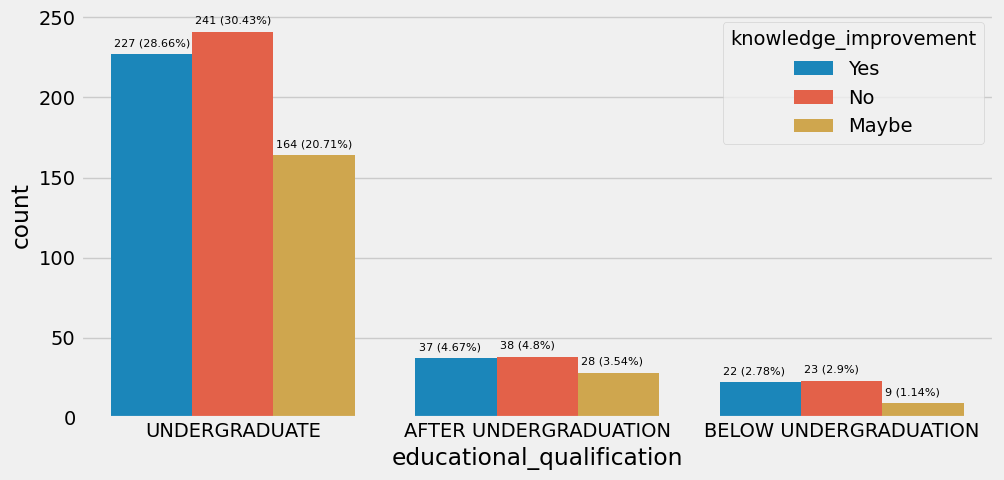

In [31]:
plt.figure(figsize = (10.5, 5))
ax = sns.countplot(data = survey_data, x = "educational_qualification", hue = "knowledge_improvement")

for p in ax.patches:
    ax.annotate('{} ({}%)'.format(int(p.get_height()), round((p.get_height() / len(survey_data['educational_qualification']))*100, 2)), (p.get_x() + 0.01, p.get_height() + 5), fontsize = 8)

plt.show()

## residing_city

In [32]:
survey_data['residing_city'] = survey_data['residing_city'].apply(lambda x: str(x).lower().strip())

In [33]:
survey_data['residing_city'].unique()

array(['humanthanagar', 'guntur', 'lucknow', 'hyderabad', 'bangalore',
       'vijayawada', 'banagalore', 'tirupati', 'medak', 'gvt house',
       'fort wayne', 'nellore', 'bengaluru', 'coimbatore', 'tbilisi',
       'rajahmundry', 'chikalsandra ,banglore', 'chittoor', 'banglore',
       'kengeri', 'avilala', 'kansas city', 'varanasi', 'hospete',
       'honnali', 'sullurpeta', 'new delhi', 'tirupathi', 'ramanagara',
       'pamur', 'srikalahasti', 'karimnagar', 'rly kodur', 'punganur',
       'narasaraopet', 'telugu', 'fairfax', 'singapore', 'kanakapura',
       'tenali', 'madhanapalli', 'sangam', 'hyderabad, telangana, india',
       'deoria', 'tho bangalore south', 'bengaluru city',
       'lucknow, uttar pradesh, india', 'bentonville', 'bengalure',
       'chennai', 'meerut', 'hosur', 'tumkur district', 'ಬೆಂಗಳೂರು',
       'mumbai', 'ballari', 'vuyyuru', 'hyd', 'sitapur', 'tamilnadu',
       'rayachoty', 'pavagada', 'jayanagar 7th block', 'bangalore urban',
       'yemmiganur', 'mad

**Cleaning this data introduces so many additional features while one hot encoding. Since we have less data, we can ignore this feature.**

In [34]:
survey_data = survey_data.drop(['residing_city'], axis = 1)

## state

In [35]:
survey_data['state'] = survey_data['state'].apply(lambda x: str(x).lower().strip())

In [36]:
survey_data['state'].unique()

array(['karnataka', 'andhra pradesh', 'uttar pradesh', 'telangana', 'ap',
       'goa', 'indiana', 'tamilnadu', 'georgia', 'state', 'karanatka',
       'tirupati', 'missouri', 'andra pradesh', 'andhra pradesh m',
       'delhi', 'andhrapradesh', 'nellore', 'karnaataka', 'virginia',
       'nan', 'andhara pradesh', 'andra', 'arkansas', 'karnatala',
       'tamil nadu', 'ಕರ್ನಾಟಕ', 'maharashtra', 'hydrebad', 'chennai',
       'hyderabad', 'other', 'maharastra', 'washington', 'jharkhand',
       'kartkath', 'massachusetts', 'tx', 'kerala', 'india', 'il', '16',
       'u. p.', 'texas', 'kerla', 'west bengal', 'karntaka', 'karnatka',
       'karantaka', 'telengana', 'in', 'karanataka', 'odisha',
       'new delhi', 'andhra pardesh', 'andhr pradesh', 'uttarakhand',
       'in - uttar pradesh (up)', 'a.p', 'ohio', 'andhra prqdesh',
       'bangalore', 'illinois', 'oklahoma', 'select an option karnataka',
       'british columbia', 'up', 'haryana'], dtype=object)

In [37]:
def to_state(value):
    
    if ('ಕರ್ನಾಟಕ' in value) | ('karna' in value) | ("karnt" in value) | ("karan" in value):
        return 'KARNATAKA'
    
    if ('andhra' in value) | ('andra' in value) | ('andhr' in value) | ('ap' in value) | ('andhara' in value) | ('a.p' in value):
        return 'ANDHRA PRADESH'
    
    if ('tamil' in value):
        return 'TAMIL NADU'
    
    if ('uttar' in value) | ('u. p.' in value) | ('up' in value):
        return 'UTTAR PRADESH'
    
    if ('tel' in value):
        return 'TELANGANA'
    
    else:
        return value

In [38]:
survey_data['state'] = survey_data['state'].apply(to_state)
survey_data['state'] = survey_data['state'].replace('nan', 'NULL')
survey_data['state'] = survey_data['state'].apply(lambda x: 'OTHER' if x.islower() | x.isnumeric() else x)
survey_data['state'] = survey_data['state'].replace('NULL', np.nan)

In [39]:
# categorical_features.remove('educational_qualification')
# categorical_features.remove('residing_city')

for feature in ['mother_tongue', 'state', 'educational_qualification']:
    survey_data[feature] = survey_data[feature].apply(lambda x: str(x).capitalize())

In [40]:
survey_data.head()

,gender,mother_tongue,mother_tongue_rating,no_of_fluent_languages,educational_qualification,state,resided_in_the_same_city_from_birth,teaching_language_preference,notes_language_preference,questionpaper_language_preference,learning_in_local_language,exam_in_regional_language,teaching_in_regional_language,knowledge_improvement
0,Female,Tamil,Excellent,5.0,Undergraduate,Karnataka,Yes,Regional Language,Regional Language,Regional Language,Yes,Yes,Yes,Yes
1,Male,Telugu,Excellent,2.0,Undergraduate,Andhra pradesh,Yes,English Language,English Language,English Language,Maybe,No,Yes,Yes
2,Female,Hindi,Good,1.0,Undergraduate,Uttar pradesh,No,Hybrid Language,English Language,Hybrid Language,Maybe,No,Maybe,No
3,Male,Telugu,Excellent,3.0,Undergraduate,Telangana,Yes,Hybrid Language,English Language,English Language,Yes,No,Yes,No
4,Male,Kannada,Excellent,3.0,After undergraduation,Karnataka,Yes,Hybrid Language,English Language,English Language,Yes,Yes,Yes,Yes


## Remaining Categorical Features

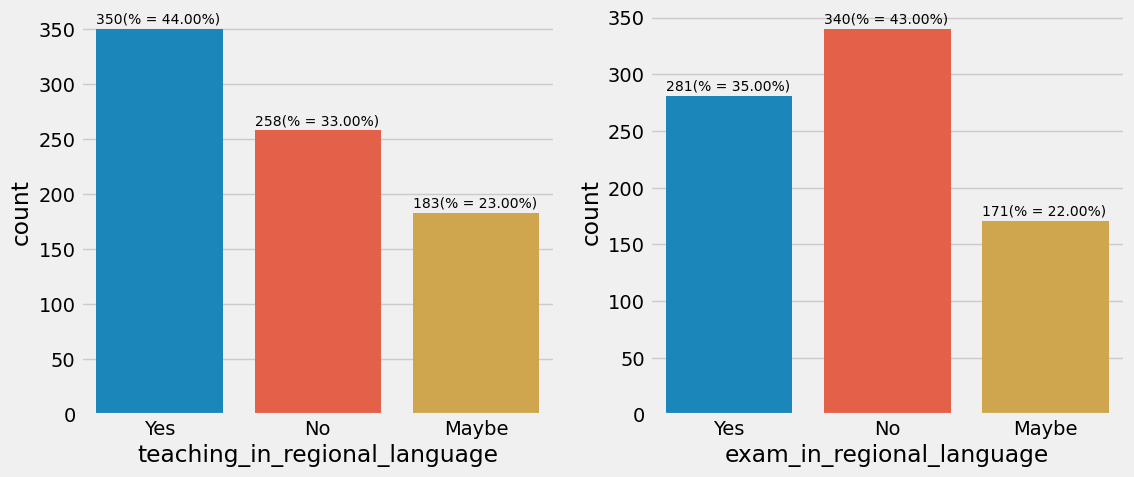

In [41]:
remaining_features = ['teaching_in_regional_language', 'exam_in_regional_language']

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

for feature, ax in zip(remaining_features, axes.ravel()):
    
    sns.countplot(data = survey_data, x = feature, ax = ax, order = ['Yes', 'No', 'Maybe'])
    
    for p in ax.patches:
        ax.annotate('{}(% = {:.2f}%)'.format(p.get_height(), round(p.get_height() / len(survey_data[feature]), 2)*100), (p.get_x(), p.get_height() + 5), fontsize = 10)
        

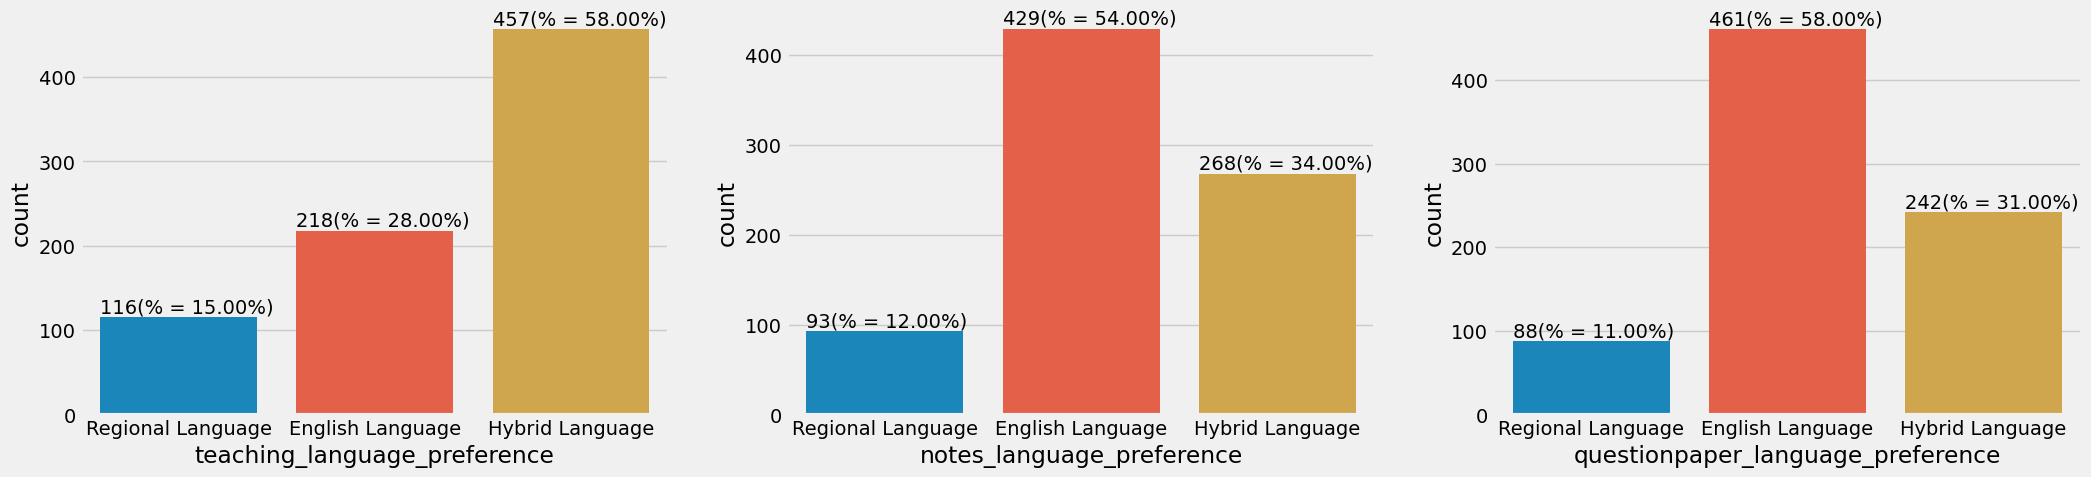

In [42]:
remaining_features = ['teaching_language_preference', 'notes_language_preference', 'questionpaper_language_preference']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (23, 5))

for feature, ax in zip(remaining_features, axes.ravel()):
    
    sns.countplot(data = survey_data, x = feature, ax = ax)
    
    for p in ax.patches:
        ax.annotate('{}(% = {:.2f}%)'.format(p.get_height(), round(p.get_height() / len(survey_data[feature]), 2)*100), (p.get_x(), p.get_height() + 5))


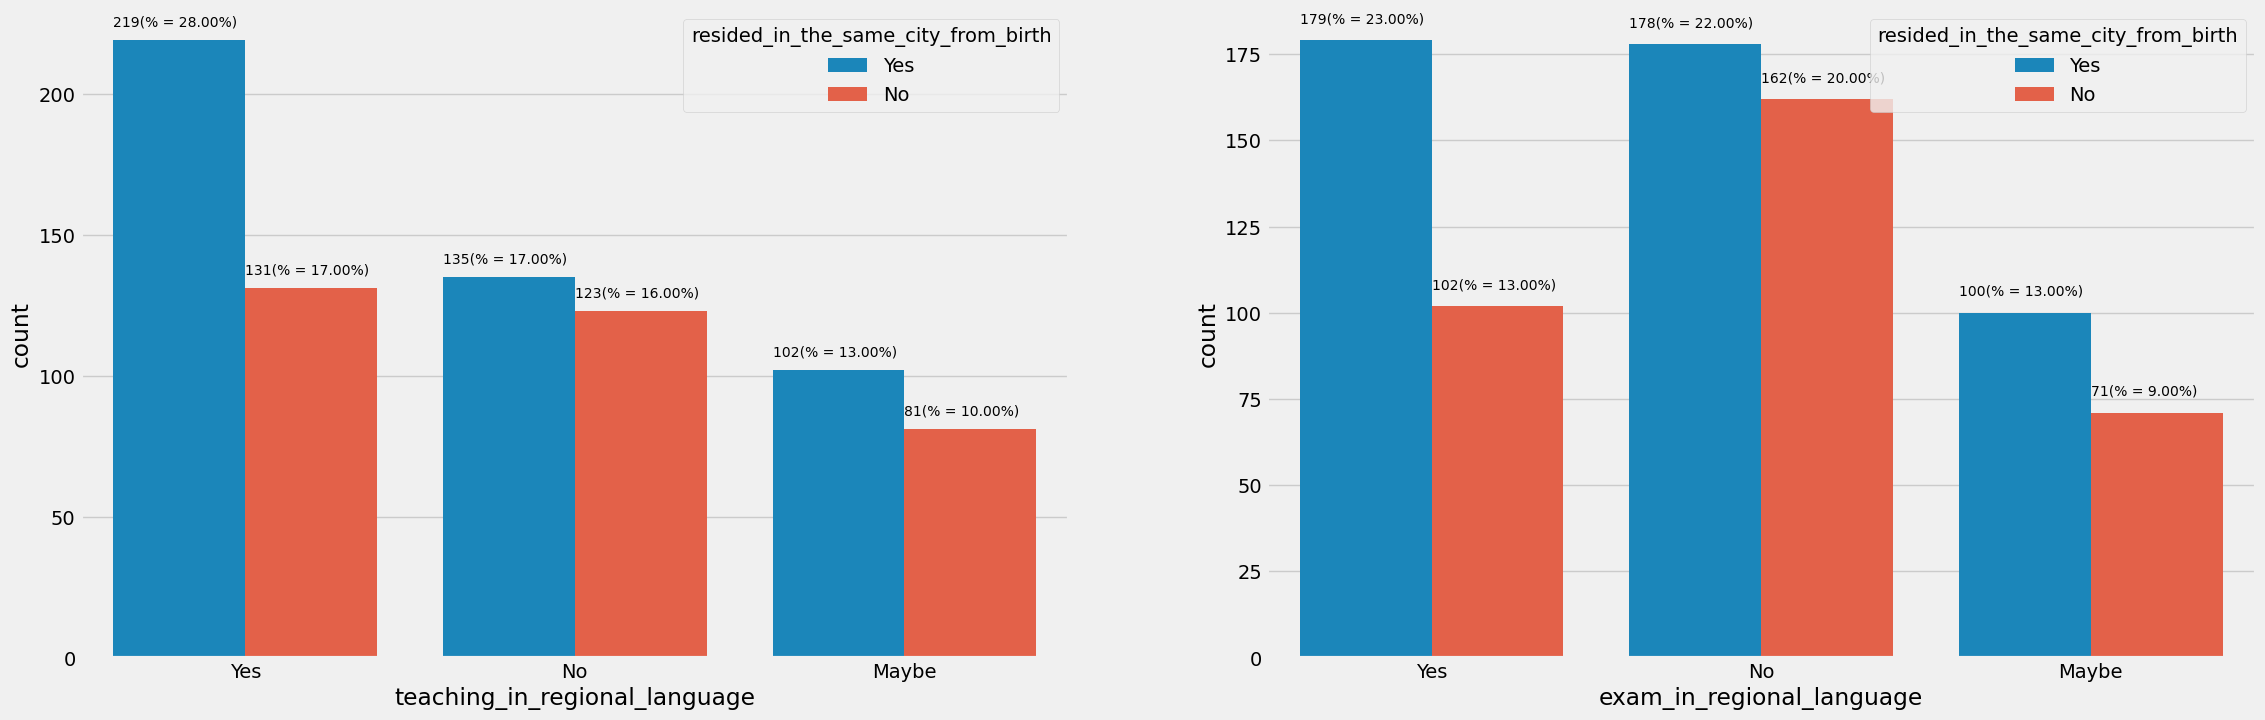

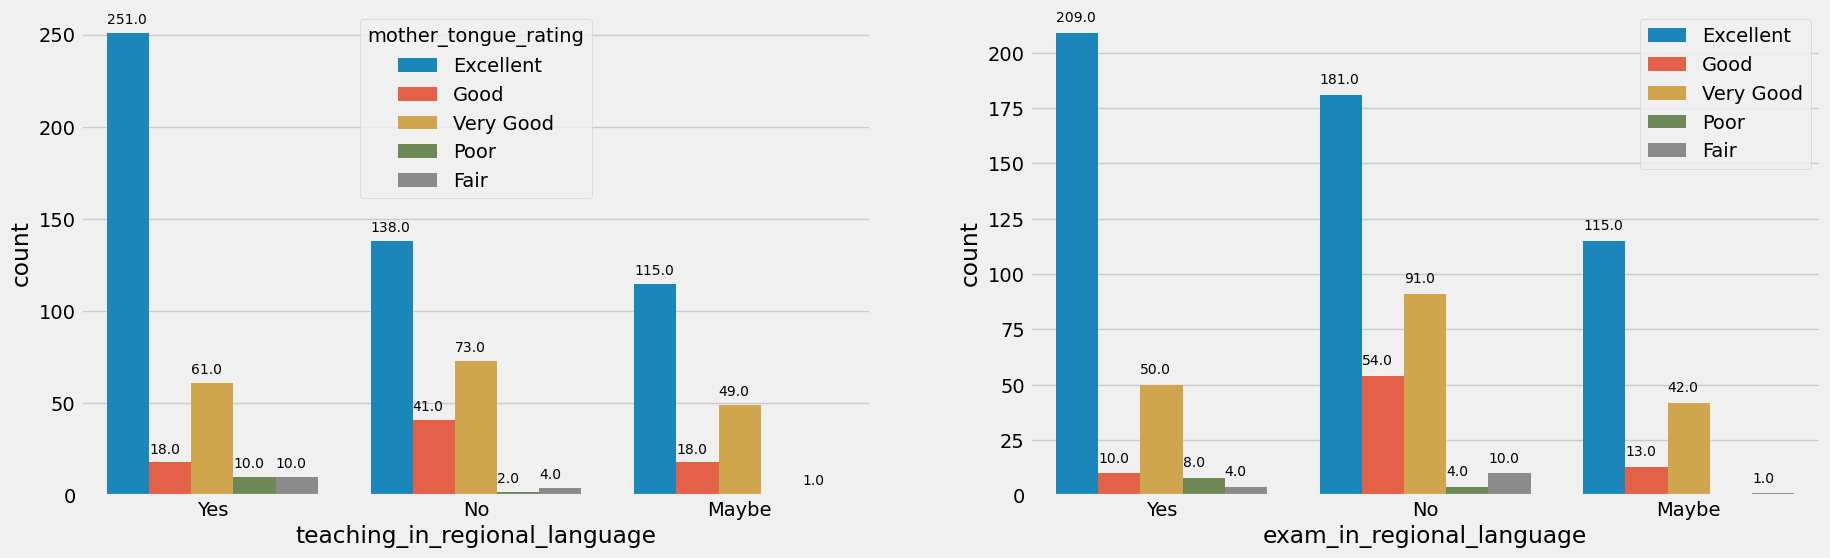

In [43]:
remaining_features = ['teaching_in_regional_language', 'exam_in_regional_language']

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 8))

for feature, ax in zip(remaining_features, axes.ravel()):
    
    sns.countplot(data = survey_data, x = feature, ax = ax, order = ['Yes', 'No', 'Maybe'], hue = 'resided_in_the_same_city_from_birth')
    
    for p in ax.patches:
        ax.annotate('{}(% = {:.2f}%)'.format(p.get_height(), round(p.get_height() / len(survey_data[feature]), 2)*100), (p.get_x(), p.get_height() + 5), fontsize = 10)


plt.show()        

remaining_features = ['teaching_in_regional_language', 'exam_in_regional_language']

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

for feature, ax in zip(remaining_features, axes.ravel()):
    
    sns.countplot(data = survey_data, x = feature, ax = ax, order = ['Yes', 'No', 'Maybe'], hue = 'mother_tongue_rating')
    
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height() + 5), fontsize = 10)
        
plt.legend(loc = 'upper right')
plt.show()

# Feature Types

In [44]:
# Getting all numerical feature names from our dataset
numerical_features = [feature for feature in survey_data.columns if survey_data[feature].dtype != 'O']

print("Total number of numerical features: ", len(numerical_features))
print(numerical_features)

print()

# Gettin all categorical feature names from our dataset
categorical_features = [feature for feature in survey_data.columns if feature not in numerical_features and feature != 'knowledge_improvement']

print("Total number of numerical features: ", len(categorical_features))
print(categorical_features)

Total number of numerical features:  1
['no_of_fluent_languages']

Total number of numerical features:  12
['gender', 'mother_tongue', 'mother_tongue_rating', 'educational_qualification', 'state', 'resided_in_the_same_city_from_birth', 'teaching_language_preference', 'notes_language_preference', 'questionpaper_language_preference', 'learning_in_local_language', 'exam_in_regional_language', 'teaching_in_regional_language']


# Saving data into new file

In [45]:
survey_data.to_csv('data_cleaned.csv', index = False)